In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
df_gdpgrowth = pd.read_excel("data/gdp-growth-percent.xlsx").dropna()
df_debt = pd.read_excel("data/government-debt-percentofgdp.xlsx").dropna()
df_unemployment = pd.read_excel("data/unemployment-rate.xlsx").dropna()

In [3]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

defaultlegend = dict(
                    x=0,         
                    y=-0.1,        
                    xanchor="left",  
                    yanchor="top", 
                    orientation="h"  
                )

# will be used
gdpgrowth = df_gdpgrowth["Value"]
debt = df_debt["Value"]
unemployment = df_unemployment["Value"]

subsidies_perc_of_GDP = [0.2501, 0.2565, 0.2408, 0.2515, 0.2668, 0.2691, 0.1352, 0.3818, 0.4370] # extracted from https://data.imf.org/regular.aspx?key=60991462
goodsandservices_perc_of_GDP = [0.65, 0.728, 0.764, 0.816, 0.805, 0.830, 0.491, 0.433, 0.446]
compensationemployees_perc_of_GDP = [1.916, 1.91, 1.972, 2.146, 2.135, 2.115, 1.738, 1.782, 1.738]

aggregated_expense = [a + b + c for a, b, c in zip(subsidies_perc_of_GDP, goodsandservices_perc_of_GDP, compensationemployees_perc_of_GDP)]

all_data = pd.DataFrame({
    "gdpgrowth": gdpgrowth,
    "debt": debt,
    "unemployment": unemployment,
    "subsidies": subsidies_perc_of_GDP,
    "goods_and_services": goodsandservices_perc_of_GDP,
    "compensationemployees": compensationemployees_perc_of_GDP,
    "aggregated_expense": aggregated_expense
})


# will not be used bc not in %
subsidies_inBnEuro = [2.511, 2.759, 2.672, 2.689, 2.862, 2.863, 1.394, 3.897, 4.513]
other_expenses_inBnEuro = [7.752, 8.558, 8.851, 7.718, 7.022, 12.555, 4.077, 3.481, 5.0690]

In [4]:
def visualizedata(attribute1, attribute2, color1, color2, title1, title2, maintitle=""):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=years, 
        y=attribute1, 
        mode="lines+markers", 
        name=title1, 
        line=dict(color=color1)
    ))

    fig.add_trace(go.Scatter(
        x=years, 
        y=attribute2, 
        mode="lines+markers", 
        name=title2, 
        line=dict(color=color2),
        yaxis="y2"  
    ))

    fig.update_layout(
        title=maintitle,
        xaxis_title="Years",
        yaxis_title=title1,
        yaxis2=dict(
            title=title2,
            overlaying="y",  
            side="right"     
        ),
        legend_title="Indicators:",
    legend=defaultlegend
    )
    pio.renderers.default = 'browser'
    fig.show()

In [5]:
def visualizedata_withGDPgrowth(attribute2, color2, title2, maintitle=""):
    colors = ["red" if value < 0 else "green" for value in gdpgrowth]
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=years, 
        y=gdpgrowth, 
        mode="lines+markers", 
        name="GDP Growth (%)", 
        line=dict(color="lightgrey"),
        marker=dict(color=colors, size=14)
    ))

    # Add dummy traces for the legend
    fig.add_trace(go.Scatter(
        x=[None],  # Invisible trace for "Negative Growth"
        y=[None],
        mode="markers",
        marker=dict(color="red"),
        name="Negative Growth"
    ))
    fig.add_trace(go.Scatter(
        x=[None],  # Invisible trace for "Positive Growth"
        y=[None],
        mode="markers",
        marker=dict(color="green"),
        name="Positive Growth"
    ))

    fig.add_trace(go.Scatter(
        x=years, 
        y=attribute2, 
        mode="lines+markers", 
        name=title2, 
        line=dict(color=color2),
        yaxis="y2"  
    ))

    fig.update_layout(
        title=maintitle,
        xaxis_title="Years",
        yaxis_title="GDP Growth (%)",
        yaxis2=dict(
            title=title2,
            overlaying="y",  
            side="right"     
        ),
        legend_title="Indicators:",
    legend=defaultlegend
    )
    fig.show()

## Visualisations

### Hier werden drei Posten der Staatsausgaben betrachtet

In [6]:
maintitle = "Government Expense & Unemployment Rate"

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=years, 
    y=unemployment, 
    mode="lines+markers", 
    name="Unemployment Rate", 
    line=dict(color="red"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=years, 
    y=subsidies_perc_of_GDP, 
    mode="lines", 
    name="Subsidies (in % of GDP)", 
    line=dict(color="green"),
    yaxis="y1"  
))

fig.add_trace(go.Scatter(
    x=years, 
    y=compensationemployees_perc_of_GDP, 
    mode="lines", 
    name="Compensation of Employees (in % of GDP)", 
    line=dict(color="lightgreen"),
    yaxis="y1"  
))

fig.add_trace(go.Scatter(
    x=years, 
    y=goodsandservices_perc_of_GDP, 
    mode="lines", 
    name="Investment in goods and services (in % of GDP)", 
    line=dict(color="blue"),
    yaxis="y1"  
))

fig.update_layout(
    title=maintitle,
    xaxis_title="Years",
    yaxis_title="Government investment (% of GDP)",
    yaxis2=dict(
        title="Unemployment Rate",
        overlaying="y",  
        side="right"     
    ),
    legend_title="Indicators:",
    legend=defaultlegend
)
pio.renderers.default = 'browser'
fig.show()

Die drei Posten in Beziehung zum BIP:

In [7]:
maintitle = "Government Expense & GDP"

fig = go.Figure()

colors = ["red" if value < 0 else "green" for value in gdpgrowth]

fig.add_trace(go.Scatter(
    x=years, 
    y=gdpgrowth, 
    mode="lines+markers", 
    name="GDP Growth (%)", 
    line=dict(color="lightgrey"),
    marker=dict(color=colors, size=14),
    yaxis="y2"
))

# dummy traces
fig.add_trace(go.Scatter(
    x=[None],  # Invisible trace for "Negative Growth"
    y=[None],
    mode="markers",
    marker=dict(color="red"),
    name="Negative Growth"
))
fig.add_trace(go.Scatter(
    x=[None],  # Invisible trace for "Positive Growth"
    y=[None],
    mode="markers",
    marker=dict(color="green"),
    name="Positive Growth"
))

fig.add_trace(go.Scatter(
    x=years, 
    y=subsidies_perc_of_GDP, 
    mode="lines", 
    name="Subsidies (in % of GDP)", 
    line=dict(color="green"),
    yaxis="y1"  
))

fig.add_trace(go.Scatter(
    x=years, 
    y=compensationemployees_perc_of_GDP, 
    mode="lines", 
    name="Compensation of Employees (in % of GDP)", 
    line=dict(color="lightgreen"),
    yaxis="y1"  
))

fig.add_trace(go.Scatter(
    x=years, 
    y=goodsandservices_perc_of_GDP, 
    mode="lines", 
    name="Investment in goods and services (in % of GDP)", 
    line=dict(color="blue"),
    yaxis="y1"  
))

fig.update_layout(
    title=maintitle,
    xaxis_title="Years",
    yaxis_title= "% of GDP",
    yaxis2=dict(
        title="GDP growth in %",
        overlaying="y",  
        side="right"     
    ),
    legend_title="Indicators:",
    legend=defaultlegend
)
pio.renderers.default = 'browser'
fig.show()

### Die drei Posten aggregiert:

in Beziehung zur Arbeitslosenquote:

In [8]:
visualizedata(aggregated_expense, unemployment, "green", "red", "Aggregated Expense (% of GDP)", "Unemployment Rate", "Aggregated Expenses & Unemployment Rate")

in Beziehung zum BIP:

In [9]:
visualizedata_withGDPgrowth(aggregated_expense, "green", "Aggregated Expense (% of GDP)", "Aggregated Expense & GDP")

### andere Größen

Schulden und BIP

In [10]:
visualizedata_withGDPgrowth(debt, "orange", "Government Debt", "GDP growth and Government Debt")

Arbeitslosigkeit und BIP

In [11]:
visualizedata_withGDPgrowth(unemployment, "red", "Unemployment rate", "GDP and Unemployment Rate")

### Korrelation zwischen verschiedenen Größen

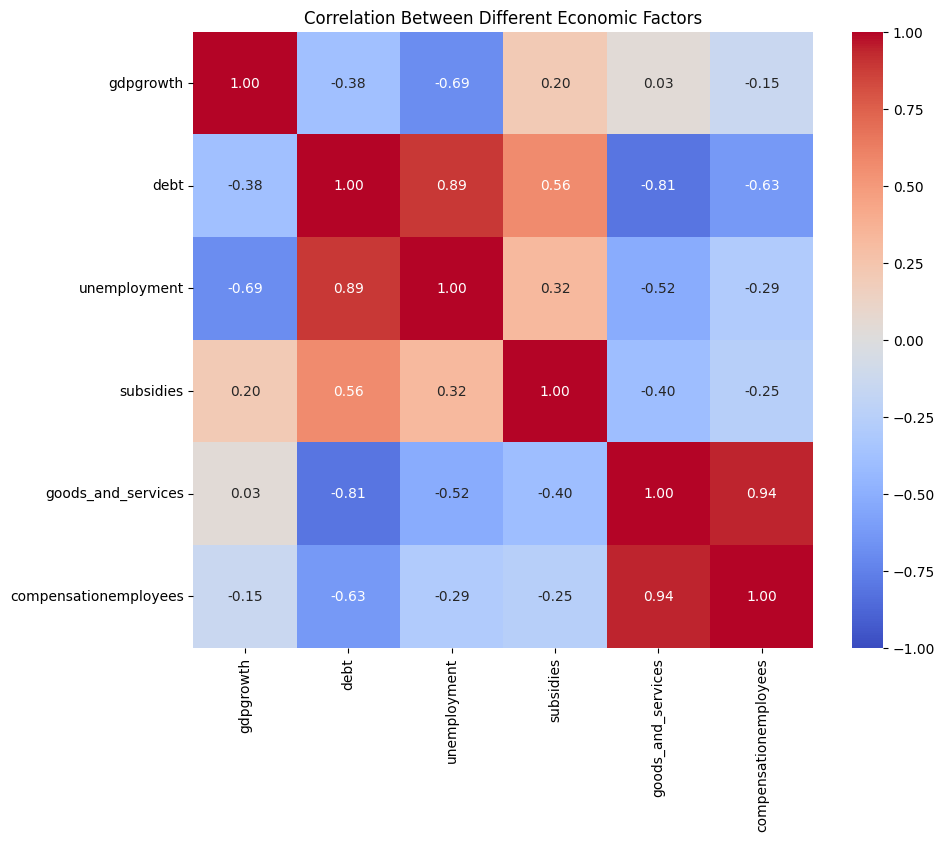

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = all_data.drop(columns=["aggregated_expense"])

correlation_matrix = subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

plt.title("Correlation Between Different Economic Factors")
plt.show()
